<a href="https://colab.research.google.com/github/fromvelarde/fromvelarde/blob/main/Ejemplo_de_Minimizaci%C3%B3n_por_diferenciaci%C3%B3n_impl%C3%ADcita%3B_uso_de_multiplicadores_de_Lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de Minimización por diferenciación implícita; uso de multiplicadores de Lagrange

# Problema:

#Minimiza la función \( f(x, y) = x^2 + y^2 \)
#sujeta a la restricción \( g(x, y) = xy - 1 = 0 \).


Solución: Primero, planteamos la ecuación de Lagrange:

$$ \mathcal{L}(x, y, \lambda) = f(x, y) - \lambda g(x, y) $$

Donde $\lambda$ es el multiplicador de Lagrange.

Las derivadas parciales de $\mathcal{L}$ son:

$$ \frac{\partial \mathcal{L}}{\partial x} = 2x - \lambda y $$
$$ \frac{\partial \mathcal{L}}{\partial y} = 2y - \lambda x $$
$$ \frac{\partial \mathcal{L}}{\partial \lambda} = -xy + 1 $$

Igualando estas derivadas a cero y resolviendo el sistema de ecuaciones resultante:

$$ 2x - \lambda y = 0 $$
$$ 2y - \lambda x = 0 $$
$$ -xy + 1 = 0 $$

Obtenemos soluciones para $x$, $y$, y $\lambda$. Supongamos una solución específica, por ejemplo, $x = 1$, $y = 1$, y $\lambda = 2$ (esto es un ejemplo, las soluciones pueden variar).

Verificamos la solución sustituyendo en la función objetivo y la restricción:

$$ f(1, 1) = 1^2 + 1^2 = 2 $$
$$ g(1, 1) = 1 \cdot 1 - 1 = 0 $$

Por lo tanto, el punto $(1, 1)$ minimiza la función $f(x, y) = x^2 + y^2$ sujeto a la restricción $g(x, y) = xy - 1 = 0$.


In [2]:
from sympy import symbols, diff, solve, Eq

# Definimos las variables y la función objetivo
x, y, l = symbols('x y l')
f = x**2 + y**2

# Definimos la restricción
g = x*y - 1

# Ecuación de Lagrange
lagrange_eq = f - l*g

# Calculamos las derivadas parciales
df_dx = diff(lagrange_eq, x)
df_dy = diff(lagrange_eq, y)
df_dl = diff(lagrange_eq, l)

# Resolvemos el sistema de ecuaciones
eq1 = Eq(df_dx, 0)
eq2 = Eq(df_dy, 0)
eq3 = Eq(df_dl, 0)

solutions = solve((eq1, eq2, eq3, g), (x, y, l), dict=True)

# Mostramos las soluciones
for sol in solutions:
    print("\nSolución:")
    print("x =", sol[x])
    print("y =", sol[y])
    print("λ =", sol[l])

    # Verificamos la solución
    objective_value = f.subs({x: sol[x], y: sol[y]})
    constraint_value = g.subs({x: sol[x], y: sol[y]})

    print("\nVerificación:")
    print("Valor de la función objetivo en la solución:", objective_value)
    print("Valor de la restricción en la solución:", constraint_value)



Solución:
x = -I
y = I
λ = -2

Verificación:
Valor de la función objetivo en la solución: -2
Valor de la restricción en la solución: 0

Solución:
x = I
y = -I
λ = -2

Verificación:
Valor de la función objetivo en la solución: -2
Valor de la restricción en la solución: 0

Solución:
x = -1
y = -1
λ = 2

Verificación:
Valor de la función objetivo en la solución: 2
Valor de la restricción en la solución: 0

Solución:
x = 1
y = 1
λ = 2

Verificación:
Valor de la función objetivo en la solución: 2
Valor de la restricción en la solución: 0



Solución:
x = -1
y = -1
λ = 2


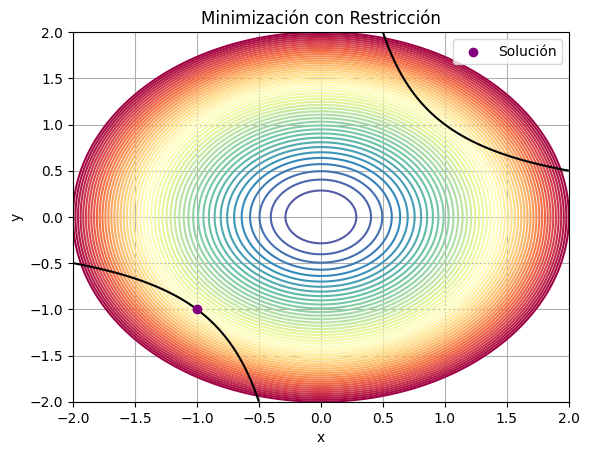


Solución:
x = 1
y = 1
λ = 2


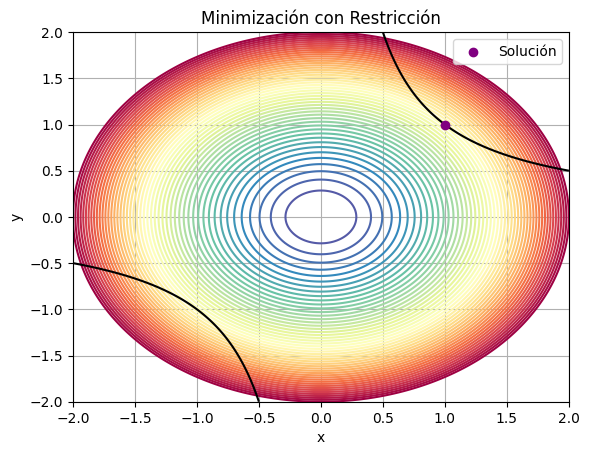

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las variables y la función objetivo
x, y, l = symbols('x y l', real=True)
f = x**2 + y**2

# Definimos la restricción
g = x*y - 1

# Ecuación de Lagrange
lagrange_eq = f - l*g

# Calculamos las derivadas parciales
df_dx = diff(lagrange_eq, x)
df_dy = diff(lagrange_eq, y)
df_dl = diff(lagrange_eq, l)

# Resolvemos el sistema de ecuaciones
eq1 = Eq(df_dx, 0)
eq2 = Eq(df_dy, 0)
eq3 = Eq(df_dl, 0)

solutions = solve((eq1, eq2, eq3, g), (x, y, l), dict=True)

# Filtramos las soluciones reales
real_solutions = [sol for sol in solutions if all(val.is_real for val in sol.values())]

# Mostramos las soluciones reales y graficamos
for sol in real_solutions:
    print("\nSolución:")
    print("x =", sol[x])
    print("y =", sol[y])
    print("λ =", sol[l])

    # Graficamos la función objetivo y la restricción
    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.linspace(-2, 2, 400)

    X, Y = np.meshgrid(x_vals, y_vals)
    Z = X**2 + Y**2

    plt.contour(X, Y, Z, levels=np.linspace(0, 4, 50), cmap='Spectral_r')
    plt.contour(X, Y, X*Y - 1, levels=[0], colors='black')  # Restricción
    plt.scatter(sol[x], sol[y], color='purple', label='Solución', zorder=5)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Minimización con Restricción')
    plt.legend()
    plt.grid(True)
    plt.show()


# Grafica 3D


Solución:
x = -1
y = -1
λ = 2


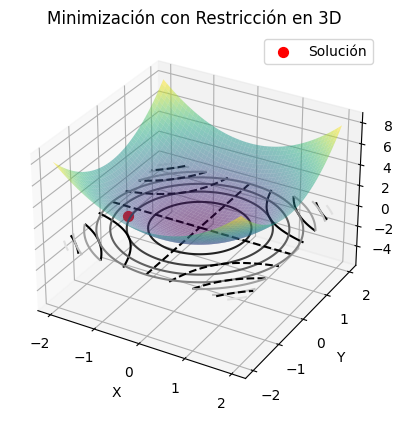


Solución:
x = 1
y = 1
λ = 2


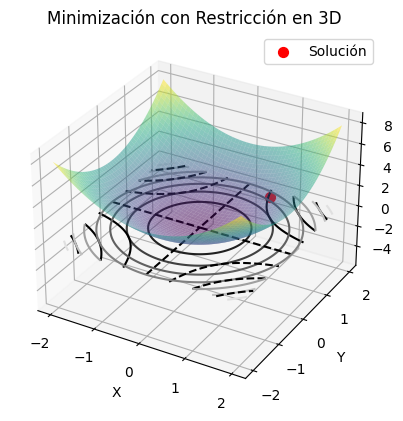

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos las variables y la función objetivo
x, y, l = symbols('x y l', real=True)
f = x**2 + y**2

# Definimos la restricción
g = x*y - 1

# Ecuación de Lagrange
lagrange_eq = f - l*g

# Calculamos las derivadas parciales
df_dx = diff(lagrange_eq, x)
df_dy = diff(lagrange_eq, y)
df_dl = diff(lagrange_eq, l)

# Resolvemos el sistema de ecuaciones
eq1 = Eq(df_dx, 0)
eq2 = Eq(df_dy, 0)
eq3 = Eq(df_dl, 0)

solutions = solve((eq1, eq2, eq3, g), (x, y, l), dict=True)

# Filtramos las soluciones reales
real_solutions = [sol for sol in solutions if all(val.is_real for val in sol.values())]

# Mostramos las soluciones reales y graficamos en 3D
for sol in real_solutions:
    print("\nSolución:")
    print("x =", sol[x])
    print("y =", sol[y])
    print("λ =", sol[l])

    # Graficamos la función objetivo y la restricción en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = X**2 + Y**2

    ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
    ax.contour(X, Y, Z, zdir='z', offset=0, cmap='gray')
    ax.contour(X, Y, X*Y - 1, zdir='z', offset=0, colors='black')  # Restricción

    ax.scatter(sol[x], sol[y], sol[x]**2 + sol[y]**2, color='red', s=50, label='Solución')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X, Y)')
    ax.set_title('Minimización con Restricción en 3D')
    ax.legend()

    plt.show()
